# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
demo_01_dummy = pd.read_csv('demo_01_dummy.csv')
demo_01_dummy.head(3)

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,tipo_residencia_House / apartment,...,educacao_Incomplete higher,educacao_Lower secondary,educacao_Secondary / secondary special,tipo_renda_Pensioner,tipo_renda_State servant,tipo_renda_Student,tipo_renda_Working,posse_de_imovel_Y,posse_de_veiculo_Y,sexo_M
0,0,58.832877,3.106849,1,0,0,0,2.0,0,1,...,0,0,1,0,0,0,1,1,1,1
1,0,52.356164,8.358904,1,0,1,1,1.0,0,1,...,0,0,1,0,0,0,0,1,0,0
2,0,46.224658,2.106849,1,1,1,1,2.0,0,1,...,0,0,0,0,0,0,1,1,1,1


In [3]:
y = demo_01_dummy.mau

In [4]:
X = demo_01_dummy.drop('mau',axis=1)

In [5]:
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [6]:
clf = clf.fit(X,y)
clf

DecisionTreeClassifier(random_state=100)

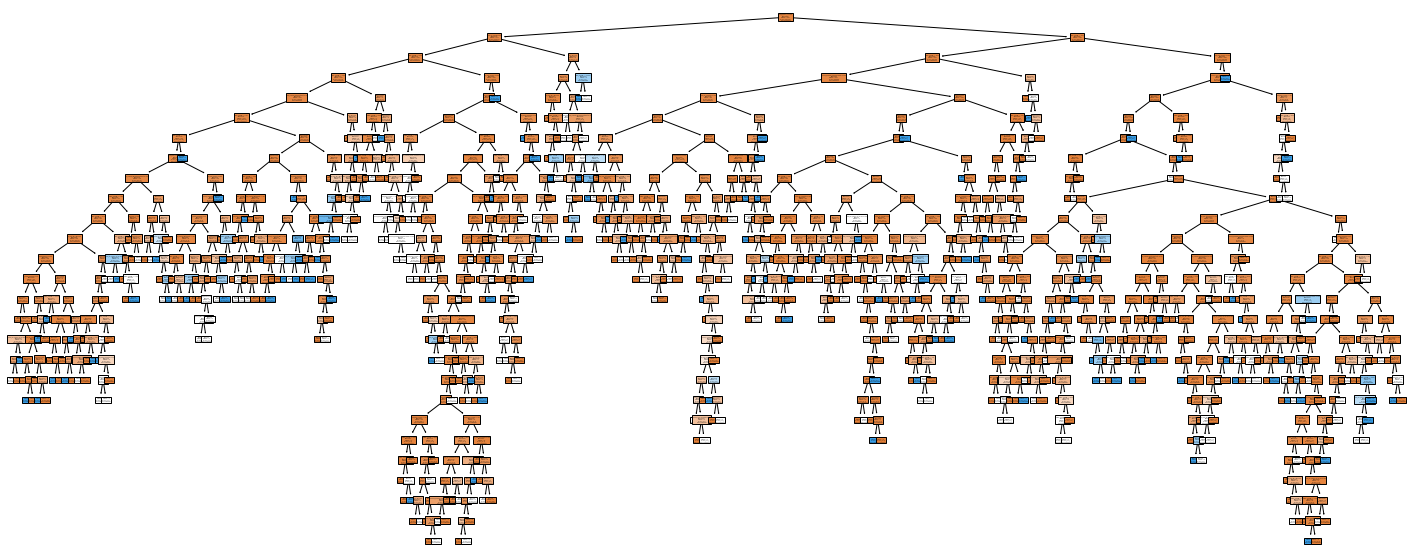

In [7]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['aprovados', 'reprovados'],
          feature_names=X.columns);

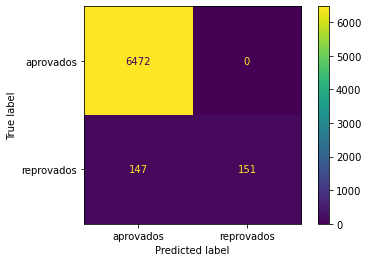

In [8]:
plot_confusion_matrix(clf, X, y, display_labels=['aprovados', 'reprovados']);

In [9]:
predict = clf.predict(X)

In [10]:
accuracy_score(y, predict)

0.9782865583456425

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [12]:
clf2 = DecisionTreeClassifier(random_state=100)
clf2 = clf2.fit(X_train,y_train)

In [13]:
predict2 = clf2.predict(X_train)
predict2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

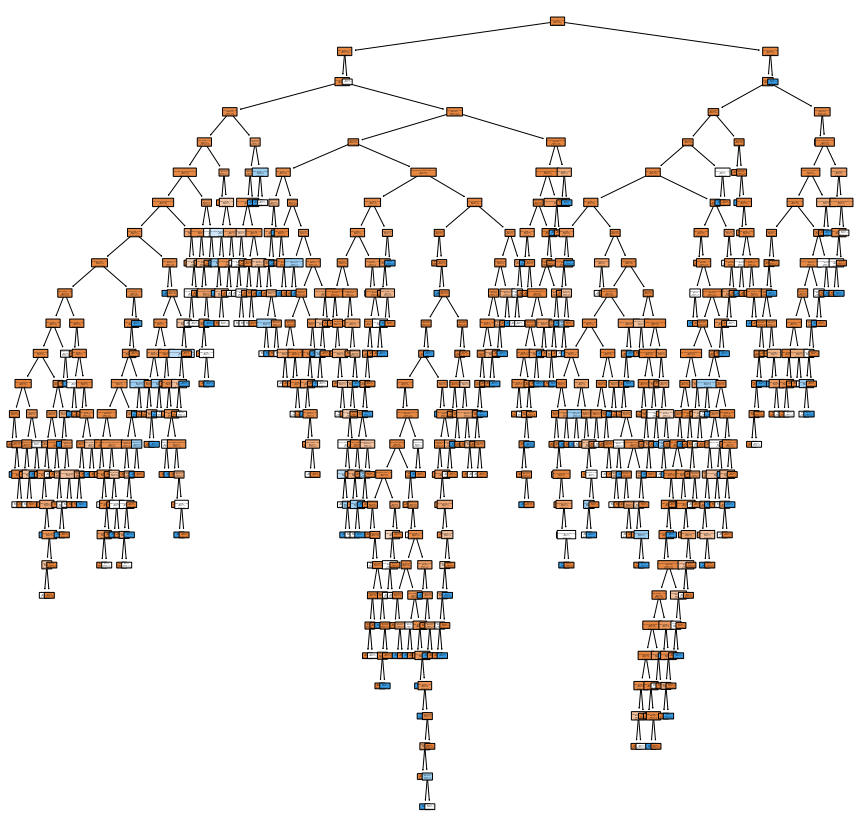

In [14]:
plt.figure(figsize=[15,15])
plot_tree(clf2,
         filled=True,
         rounded=True,
         class_names=['aprovados', 'reprovados'],
         feature_names=X_train.columns);

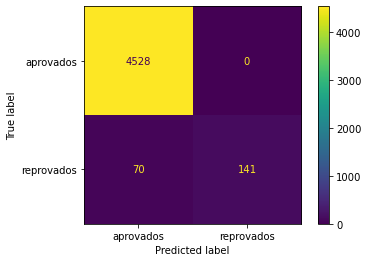

In [15]:
plot_confusion_matrix(clf2, X_train,y_train, display_labels=['aprovados', 'reprovados']);

In [16]:
accuracy_score(y_train, predict2)

0.9852289512555391

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [18]:
clf3 = DecisionTreeClassifier(random_state=100)
clf3 = clf3.fit(X_test,y_test)

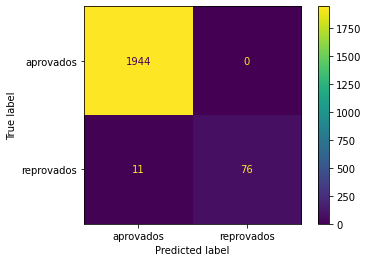

In [19]:
plot_confusion_matrix(clf3, X_test,y_test, display_labels=['aprovados', 'reprovados']);

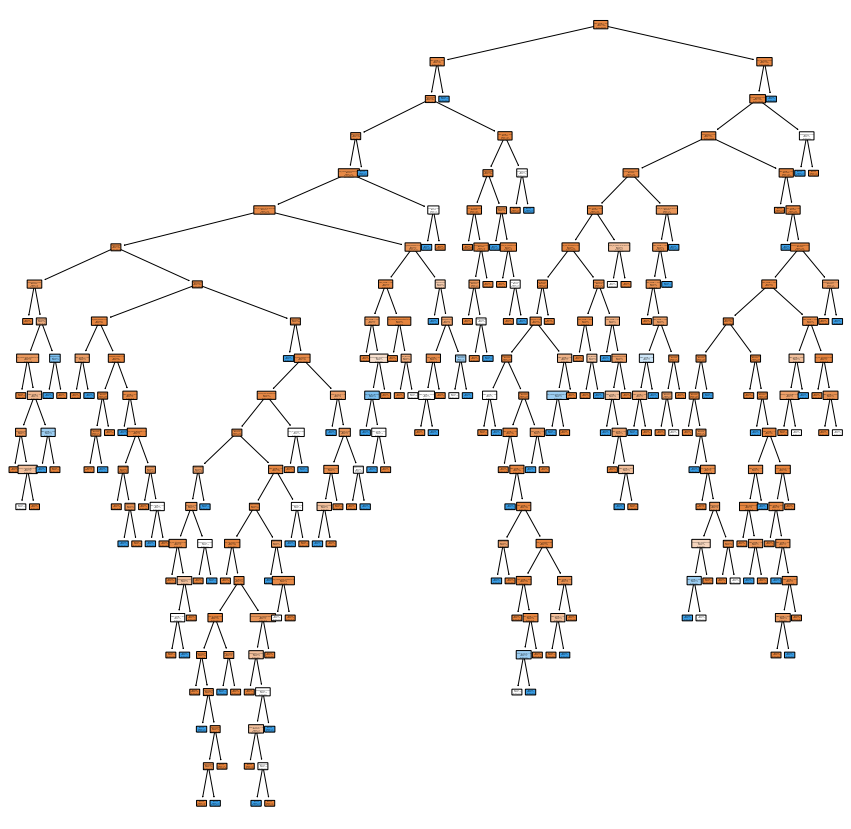

In [20]:
plt.figure(figsize=[15,15])
plot_tree(clf3,
         filled=True,
         rounded=True,
         class_names=['aprovados', 'reprovados'],
         feature_names=X_test.columns);

In [21]:
predict3 = clf3.predict(X_test)
predict3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
accuracy_score(y_test, predict3)

0.9945839487936977

Acuracia treinamento = 0.9852289512555391

Acuracia teste       = 0.9945839487936977

In [27]:
clf4 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=123)
clf4 = clf4.fit(X_test,y_test)
predict4 = clf4.predict(X_test)
accuracy_score(y_test, predict4)

0.9571639586410635